In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn joblib

In [2]:
# ============================================================================
# CELDA 2: IMPORTACIÓN DE LIBRERÍAS
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)
from sklearn.ensemble import RandomForestClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [3]:
# ============================================================================
# CELDA 3: CARGA Y EXPLORACIÓN DE DATOS
# ============================================================================

# Cargar el dataset
df = pd.read_csv('dataset_orientacion_vocacional_250.csv')

print("="*70)
print("INFORMACIÓN DEL DATASET")
print("="*70)
print(f"📊 Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\n📋 Columnas ({len(df.columns)}):")
print(df.columns.tolist())

# Mostrar primeras filas
print("\n🔍 Primeras 5 filas:")
display(df.head())

# Información general
print("\n" + "="*70)
print("INFORMACIÓN DE TIPOS DE DATOS")
print("="*70)
df.info()

# Verificar valores nulos
print("\n" + "="*70)
print("VALORES NULOS")
print("="*70)
nulos = df.isnull().sum()
if nulos.sum() == 0:
    print("✅ No hay valores nulos en el dataset")
else:
    print(nulos[nulos > 0])



INFORMACIÓN DEL DATASET
📊 Dimensiones: 250 filas x 18 columnas

📋 Columnas (18):
['R', 'I', 'A', 'S', 'E', 'C', 'LM', 'L', 'ES', 'M', 'CK', 'IP', 'IA', 'N', 'Rendimiento_General', 'Rendimiento_STEM', 'Rendimiento_Humanidades', 'Carrera']

🔍 Primeras 5 filas:


,R,I,A,S,E,C,LM,L,ES,M,CK,IP,IA,N,Rendimiento_General,Rendimiento_STEM,Rendimiento_Humanidades,Carrera
0,4.1,3.8,1.9,2.7,3.7,4.2,4.9,2.6,4.4,1.0,2.7,3.3,3.0,2.3,5,5,2,Ingeniería Civil
1,3.9,4.1,2.8,3.3,3.2,3.9,4.3,2.7,4.8,1.2,2.9,3.2,3.3,2.4,3,5,4,Ingeniería Civil
2,3.6,4.7,1.6,2.8,3.6,4.4,4.4,2.7,4.1,2.0,3.3,3.8,3.9,3.3,4,5,3,Ingeniería Civil
3,4.1,4.2,2.1,2.7,3.3,4.4,4.6,3.1,4.2,2.1,2.7,3.2,4.0,3.0,5,4,4,Ingeniería Civil
4,3.8,4.6,1.6,3.3,3.8,3.9,4.1,3.4,4.6,2.1,2.7,3.3,3.9,3.0,3,5,2,Ingeniería Civil



INFORMACIÓN DE TIPOS DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   R                        250 non-null    float64
 1   I                        250 non-null    float64
 2   A                        250 non-null    float64
 3   S                        250 non-null    float64
 4   E                        250 non-null    float64
 5   C                        250 non-null    float64
 6   LM                       250 non-null    float64
 7   L                        250 non-null    float64
 8   ES                       250 non-null    float64
 9   M                        250 non-null    float64
 10  CK                       250 non-null    float64
 11  IP                       250 non-null    float64
 12  IA                       250 non-null    float64
 13  N                        250 non-null    float64


DISTRIBUCIÓN DE CARRERAS
Carrera
Ingeniería Civil              23
Ingeniería en Sistemas        23
Medicina                      23
Derecho                       23
Arquitectura                  23
Psicología                    23
Educación                     23
Enfermería                    23
Administración de Empresas    22
Comunicación Social           22
Contabilidad                  22
Name: count, dtype: int64

📈 Total de carreras: 11
📊 Promedio por carrera: 22.7
📉 Desviación estándar: 0.5


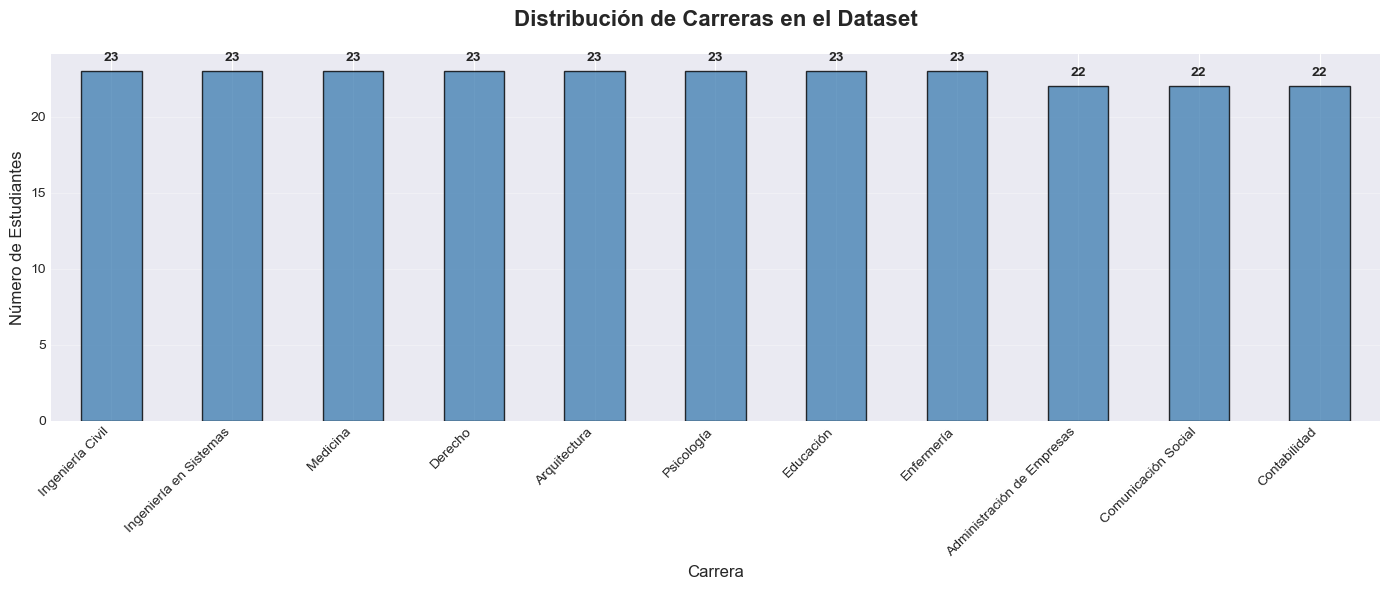

In [4]:
# ============================================================================
# CELDA 4: ANÁLISIS DE DISTRIBUCIÓN DE CARRERAS
# ============================================================================

print("="*70)
print("DISTRIBUCIÓN DE CARRERAS")
print("="*70)
distribucion = df['Carrera'].value_counts()
print(distribucion)
print(f"\n📈 Total de carreras: {len(distribucion)}")
print(f"📊 Promedio por carrera: {distribucion.mean():.1f}")
print(f"📉 Desviación estándar: {distribucion.std():.1f}")

# Visualización
plt.figure(figsize=(14, 6))
distribucion.plot(kind='bar', color='steelblue', edgecolor='black', alpha=0.8)
plt.title('Distribución de Carreras en el Dataset', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Carrera', fontsize=12)
plt.ylabel('Número de Estudiantes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(distribucion.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()



In [5]:
# ============================================================================
# CELDA 5: ESTADÍSTICAS DESCRIPTIVAS
# ============================================================================

print("="*70)
print("ESTADÍSTICAS DESCRIPTIVAS DE FEATURES")
print("="*70)

# Seleccionar solo columnas numéricas (sin la carrera)
features_numericas = df.drop('Carrera', axis=1)

# Mostrar estadísticas
display(features_numericas.describe().round(2))

# Estadísticas por dimensión
print("\n📊 PROMEDIOS POR TIPO DE DIMENSIÓN:")
print("-" * 70)
print(f"RIASEC (R,I,A,S,E,C): {df[['R','I','A','S','E','C']].mean().mean():.2f}")
print(f"Gardner (LM-N): {df[['LM','L','ES','M','CK','IP','IA','N']].mean().mean():.2f}")
print(f"Rendimientos: {df[['Rendimiento_General','Rendimiento_STEM','Rendimiento_Humanidades']].mean().mean():.2f}")




ESTADÍSTICAS DESCRIPTIVAS DE FEATURES


,R,I,A,S,E,C,LM,L,ES,M,CK,IP,IA,N,Rendimiento_General,Rendimiento_STEM,Rendimiento_Humanidades
count,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00
mean,2.84,4.01,2.89,3.97,3.63,4.03,3.96,3.95,3.39,2.27,2.97,4.19,4.06,2.59,4.16,3.78,3.80
std,0.83,0.45,0.95,0.80,0.67,0.47,0.61,0.67,0.94,0.78,0.79,0.67,0.39,0.57,0.80,0.96,0.86
min,1.50,3.10,1.50,2.50,2.50,2.80,2.60,2.50,1.60,1.00,1.50,2.80,3.00,1.50,3.00,2.00,2.00
25%,2.10,3.70,2.20,3.20,3.10,3.70,3.50,3.40,2.52,1.70,2.30,3.60,3.80,2.10,3.00,3.00,3.00
50%,2.70,4.00,2.70,4.20,3.60,4.05,4.00,4.10,3.30,2.20,3.00,4.50,4.10,2.60,4.00,4.00,4.00
75%,3.60,4.30,3.40,4.70,4.10,4.40,4.50,4.50,4.20,2.80,3.70,4.78,4.38,3.00,5.00,4.00,4.00
max,4.50,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,4.50,5.00,4.90,4.00,5.00,5.00,5.00



📊 PROMEDIOS POR TIPO DE DIMENSIÓN:
----------------------------------------------------------------------
RIASEC (R,I,A,S,E,C): 3.56
Gardner (LM-N): 3.42
Rendimientos: 3.91


ANÁLISIS DE CORRELACIONES


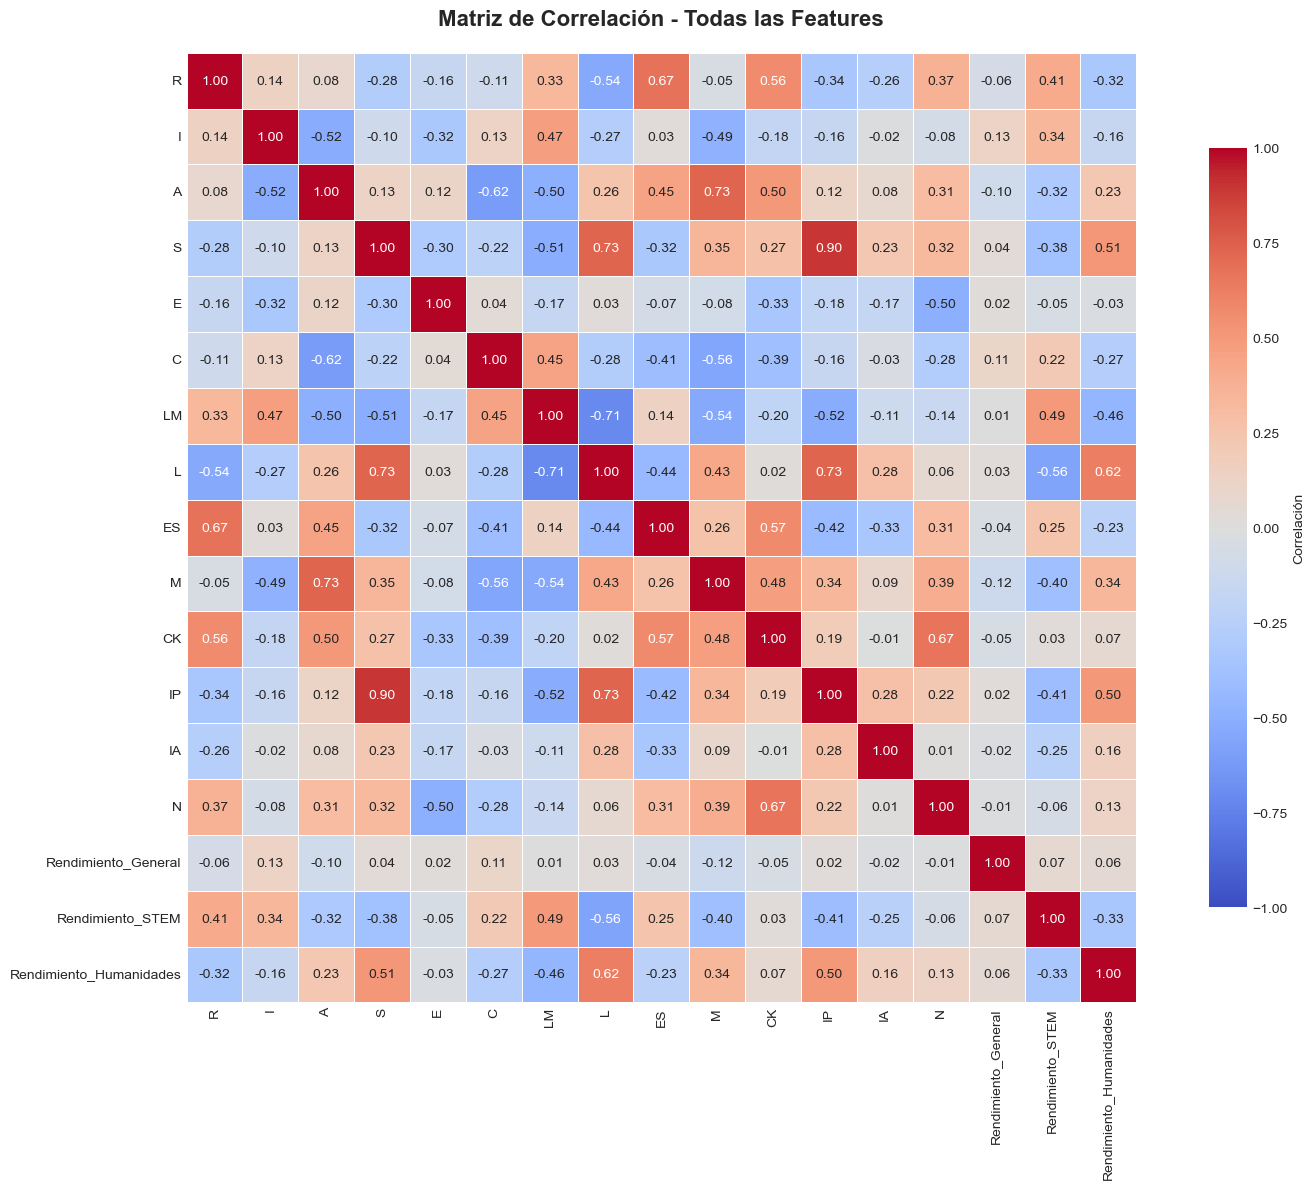


🔗 TOP 10 CORRELACIONES MÁS ALTAS:
----------------------------------------------------------------------
S                         <-> IP                       :  0.896
IP                        <-> S                        :  0.896
A                         <-> M                        :  0.732
M                         <-> A                        :  0.732
L                         <-> IP                       :  0.730
IP                        <-> L                        :  0.730
S                         <-> L                        :  0.727
L                         <-> S                        :  0.727
LM                        <-> L                        : -0.709
L                         <-> LM                       : -0.709


In [6]:
# ============================================================================
# CELDA 6: MATRIZ DE CORRELACIÓN
# ============================================================================

print("="*70)
print("ANÁLISIS DE CORRELACIONES")
print("="*70)

# Calcular correlación
correlation_matrix = features_numericas.corr()

# Visualización
plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm',
    center=0,
    square=True, 
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlación"},
    vmin=-1, vmax=1
)
plt.title('Matriz de Correlación - Todas las Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Mostrar correlaciones más altas
print("\n🔗 TOP 10 CORRELACIONES MÁS ALTAS:")
print("-" * 70)
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1.0]  # Excluir diagonal
top_correlations = corr_pairs.abs().sort_values(ascending=False).head(10)
for (feat1, feat2), corr_value in top_correlations.items():
    print(f"{feat1:25s} <-> {feat2:25s}: {corr_pairs[feat1, feat2]:6.3f}")



In [7]:
# ============================================================================
# CELDA 7: PREPARACIÓN DE DATOS
# ============================================================================

print("="*70)
print("PREPARACIÓN DE DATOS PARA ENTRENAMIENTO")
print("="*70)

# Separar features (X) y target (y)
X = df.drop('Carrera', axis=1)
y = df['Carrera']

print(f"✅ Features (X): {X.shape}")
print(f"✅ Target (y): {y.shape}")

print(f"\n📋 Features utilizadas ({len(X.columns)}):")
for i, col in enumerate(X.columns, 1):
    print(f"   {i:2d}. {col}")

# Codificar las etiquetas de carrera
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\n🏷️  CARRERAS CODIFICADAS:")
print("-" * 70)
for i, carrera in enumerate(label_encoder.classes_):
    count = (y_encoded == i).sum()
    print(f"   {i:2d}. {carrera:30s} ({count} registros)")

# Guardar el label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')
print("\n💾 Label Encoder guardado como 'label_encoder.pkl'")


PREPARACIÓN DE DATOS PARA ENTRENAMIENTO
✅ Features (X): (250, 17)
✅ Target (y): (250,)

📋 Features utilizadas (17):
    1. R
    2. I
    3. A
    4. S
    5. E
    6. C
    7. LM
    8. L
    9. ES
   10. M
   11. CK
   12. IP
   13. IA
   14. N
   15. Rendimiento_General
   16. Rendimiento_STEM
   17. Rendimiento_Humanidades

🏷️  CARRERAS CODIFICADAS:
----------------------------------------------------------------------
    0. Administración de Empresas     (22 registros)
    1. Arquitectura                   (23 registros)
    2. Comunicación Social            (22 registros)
    3. Contabilidad                   (22 registros)
    4. Derecho                        (23 registros)
    5. Educación                      (23 registros)
    6. Enfermería                     (23 registros)
    7. Ingeniería Civil               (23 registros)
    8. Ingeniería en Sistemas         (23 registros)
    9. Medicina                       (23 registros)
   10. Psicología                     (23 r

In [8]:
# ============================================================================
# CELDA 8: DIVISIÓN DE DATOS (TRAIN/TEST)
# ============================================================================

print("="*70)
print("DIVISIÓN DE DATOS")
print("="*70)

# División estratificada 80-20
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

print(f"📚 Datos de entrenamiento: {X_train.shape[0]} registros ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"📝 Datos de prueba: {X_test.shape[0]} registros ({X_test.shape[0]/len(X)*100:.1f}%)")

# Verificar distribución estratificada
print("\n✅ DISTRIBUCIÓN ESTRATIFICADA:")
print("-" * 70)
train_dist = pd.Series(y_train).value_counts().sort_index()
test_dist = pd.Series(y_test).value_counts().sort_index()

comparison_df = pd.DataFrame({
    'Carrera': label_encoder.classes_,
    'Train': train_dist.values,
    'Test': test_dist.values,
    'Total': train_dist.values + test_dist.values
})
display(comparison_df)


DIVISIÓN DE DATOS
📚 Datos de entrenamiento: 200 registros (80.0%)
📝 Datos de prueba: 50 registros (20.0%)

✅ DISTRIBUCIÓN ESTRATIFICADA:
----------------------------------------------------------------------


,Carrera,Train,Test,Total
0,Administración de Empresas,18,4,22
1,Arquitectura,18,5,23
2,Comunicación Social,18,4,22
3,Contabilidad,18,4,22
4,Derecho,19,4,23
5,Educación,18,5,23
6,Enfermería,19,4,23
7,Ingeniería Civil,18,5,23
8,Ingeniería en Sistemas,18,5,23
9,Medicina,18,5,23


In [9]:
# ============================================================================
# CELDA 9: ENTRENAMIENTO - RANDOM FOREST
# ============================================================================

print("="*70)
print("🌲 ENTRENANDO RANDOM FOREST")
print("="*70)

# Configuración del modelo
print("⚙️  Configuración del modelo:")
print("-" * 70)
print("   - n_estimators: 200 (número de árboles)")
print("   - max_depth: 15 (profundidad máxima)")
print("   - min_samples_split: 5")
print("   - min_samples_leaf: 2")
print("   - class_weight: balanced")
print("   - random_state: 42")
print()

# Inicializar modelo
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced',
    verbose=0
)

# Entrenar
print("🚀 Iniciando entrenamiento...")
rf_model.fit(X_train, y_train)
print("✅ Random Forest entrenado exitosamente!")

# Guardar modelo
joblib.dump(rf_model, 'modelo_random_forest.pkl')
print("\n💾 Modelo guardado como 'modelo_random_forest.pkl'")


🌲 ENTRENANDO RANDOM FOREST
⚙️  Configuración del modelo:
----------------------------------------------------------------------
   - n_estimators: 200 (número de árboles)
   - max_depth: 15 (profundidad máxima)
   - min_samples_split: 5
   - min_samples_leaf: 2
   - class_weight: balanced
   - random_state: 42

🚀 Iniciando entrenamiento...
✅ Random Forest entrenado exitosamente!

💾 Modelo guardado como 'modelo_random_forest.pkl'


In [10]:
# ============================================================================
# CELDA 10: EVALUACIÓN DEL MODELO - MÉTRICAS BÁSICAS
# ============================================================================

print("="*70)
print("📊 EVALUACIÓN DEL MODELO")
print("="*70)

# Predicciones
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Métricas en Train
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')

# Métricas en Test
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')

print("\n📈 MÉTRICAS DE ENTRENAMIENTO:")
print("-" * 70)
print(f"   Accuracy:  {accuracy_train:.4f} ({accuracy_train*100:.2f}%)")
print(f"   Precision: {precision_train:.4f}")
print(f"   Recall:    {recall_train:.4f}")
print(f"   F1-Score:  {f1_train:.4f}")

print("\n📉 MÉTRICAS DE PRUEBA (TEST):")
print("-" * 70)
print(f"   Accuracy:  {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")
print(f"   Precision: {precision_test:.4f}")
print(f"   Recall:    {recall_test:.4f}")
print(f"   F1-Score:  {f1_test:.4f}")

# Análisis de overfitting
diff_accuracy = accuracy_train - accuracy_test
print(f"\n🔍 Diferencia Train-Test: {diff_accuracy:.4f}")
if diff_accuracy < 0.05:
    print("   ✅ Excelente generalización")
elif diff_accuracy < 0.10:
    print("   ⚠️  Ligero overfitting")
else:
    print("   ❌ Posible overfitting significativo")


📊 EVALUACIÓN DEL MODELO

📈 MÉTRICAS DE ENTRENAMIENTO:
----------------------------------------------------------------------
   Accuracy:  1.0000 (100.00%)
   Precision: 1.0000
   Recall:    1.0000
   F1-Score:  1.0000

📉 MÉTRICAS DE PRUEBA (TEST):
----------------------------------------------------------------------
   Accuracy:  0.9600 (96.00%)
   Precision: 0.9673
   Recall:    0.9600
   F1-Score:  0.9570

🔍 Diferencia Train-Test: 0.0400
   ✅ Excelente generalización


In [11]:
# ============================================================================
# CELDA 11: CLASSIFICATION REPORT DETALLADO
# ============================================================================

print("="*70)
print("📋 REPORTE DE CLASIFICACIÓN DETALLADO")
print("="*70)

print("\n" + classification_report(
    y_test, 
    y_pred_test, 
    target_names=label_encoder.classes_,
    digits=4
))

📋 REPORTE DE CLASIFICACIÓN DETALLADO

                            precision    recall  f1-score   support

Administración de Empresas     1.0000    1.0000    1.0000         4
              Arquitectura     1.0000    1.0000    1.0000         5
       Comunicación Social     1.0000    1.0000    1.0000         4
              Contabilidad     1.0000    1.0000    1.0000         4
                   Derecho     1.0000    1.0000    1.0000         4
                 Educación     1.0000    1.0000    1.0000         5
                Enfermería     0.8000    1.0000    0.8889         4
          Ingeniería Civil     1.0000    1.0000    1.0000         5
    Ingeniería en Sistemas     1.0000    1.0000    1.0000         5
                  Medicina     1.0000    0.6000    0.7500         5
                Psicología     0.8333    1.0000    0.9091         5

                  accuracy                         0.9600        50
                 macro avg     0.9667    0.9636    0.9589        50
        

🎯 MATRIZ DE CONFUSIÓN


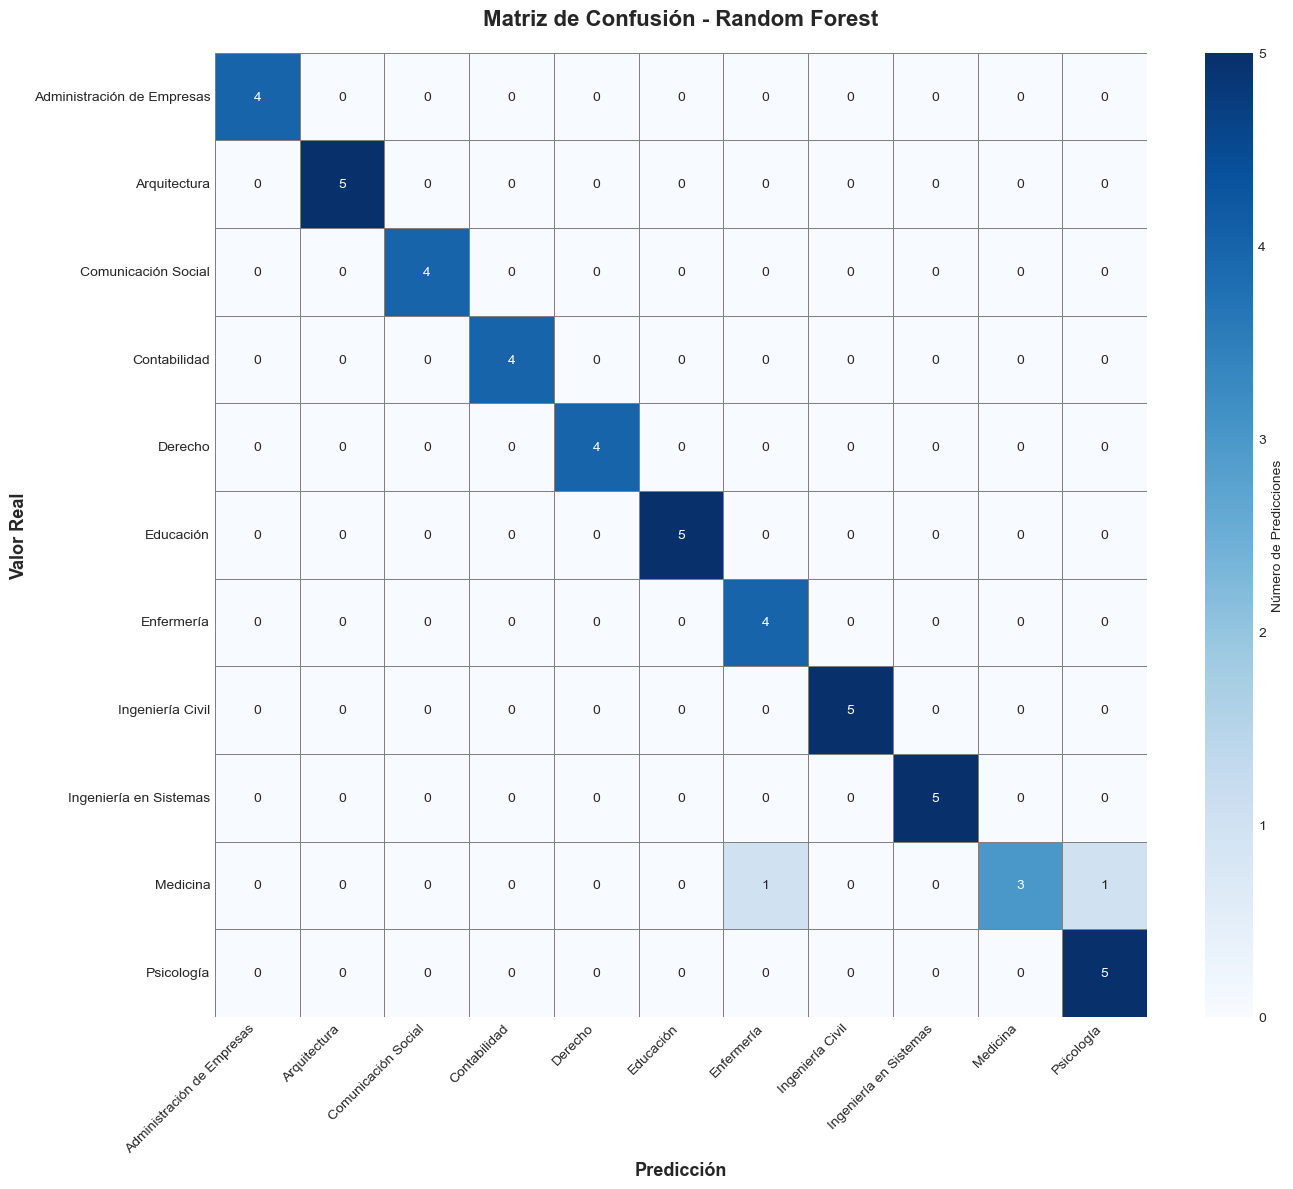


📊 ACCURACY POR CARRERA:
----------------------------------------------------------------------
   Administración de Empresas    : 1.0000 (100.00%) - 4/4 correctas
   Arquitectura                  : 1.0000 (100.00%) - 5/5 correctas
   Comunicación Social           : 1.0000 (100.00%) - 4/4 correctas
   Contabilidad                  : 1.0000 (100.00%) - 4/4 correctas
   Derecho                       : 1.0000 (100.00%) - 4/4 correctas
   Educación                     : 1.0000 (100.00%) - 5/5 correctas
   Enfermería                    : 1.0000 (100.00%) - 4/4 correctas
   Ingeniería Civil              : 1.0000 (100.00%) - 5/5 correctas
   Ingeniería en Sistemas        : 1.0000 (100.00%) - 5/5 correctas
   Medicina                      : 0.6000 (60.00%) - 3/5 correctas
   Psicología                    : 1.0000 (100.00%) - 5/5 correctas


In [12]:
# ============================================================================
# CELDA 12: MATRIZ DE CONFUSIÓN
# ============================================================================

print("="*70)
print("🎯 MATRIZ DE CONFUSIÓN")
print("="*70)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

# Visualización
plt.figure(figsize=(14, 12))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
    cbar_kws={'label': 'Número de Predicciones'},
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Matriz de Confusión - Random Forest', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicción', fontsize=13, fontweight='bold')
plt.ylabel('Valor Real', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Accuracy por carrera
print("\n📊 ACCURACY POR CARRERA:")
print("-" * 70)
for i, carrera in enumerate(label_encoder.classes_):
    correct = cm[i, i]
    total = cm[i].sum()
    acc = correct / total if total > 0 else 0
    print(f"   {carrera:30s}: {acc:.4f} ({acc*100:.2f}%) - {correct}/{total} correctas")



🔑 IMPORTANCIA DE FEATURES

📊 TOP 10 FEATURES MÁS IMPORTANTES:
----------------------------------------------------------------------
   ES                            : 0.1020
   R                             : 0.0967
   CK                            : 0.0954
   A                             : 0.0922
   LM                            : 0.0918
   S                             : 0.0864
   M                             : 0.0735
   IP                            : 0.0664
   E                             : 0.0663
   L                             : 0.0613


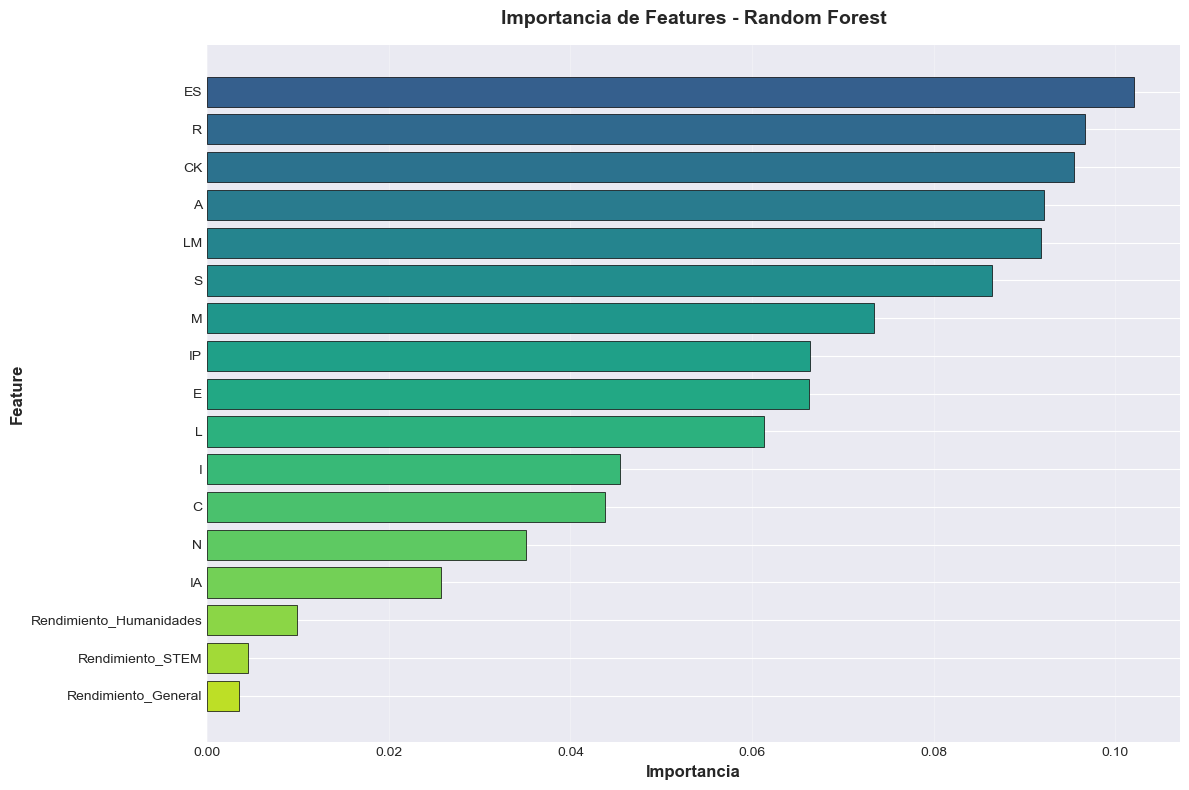

In [13]:
# ============================================================================
# CELDA 13: IMPORTANCIA DE FEATURES
# ============================================================================

print("="*70)
print("🔑 IMPORTANCIA DE FEATURES")
print("="*70)

# Obtener importancias
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n📊 TOP 10 FEATURES MÁS IMPORTANTES:")
print("-" * 70)
for idx, row in feature_importance.head(10).iterrows():
    print(f"   {row['Feature']:30s}: {row['Importance']:.4f}")

# Visualización completa
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_importance)))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors, edgecolor='black', linewidth=0.5)
plt.xlabel('Importancia', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Importancia de Features - Random Forest', fontsize=14, fontweight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


🔄 VALIDACIÓN CRUZADA (5-FOLD)
⏳ Ejecutando validación cruzada...

📊 RESULTADOS:
----------------------------------------------------------------------
   Scores por Fold: ['0.9750', '1.0000', '1.0000', '0.9750', '1.0000']

   📈 Media:           0.9900 (99.00%)
   📉 Desv. Estándar:  0.0122
   🎯 Min:             0.9750
   🎯 Max:             1.0000

   📊 Intervalo de Confianza 95%:
      [0.9660, 1.0140]


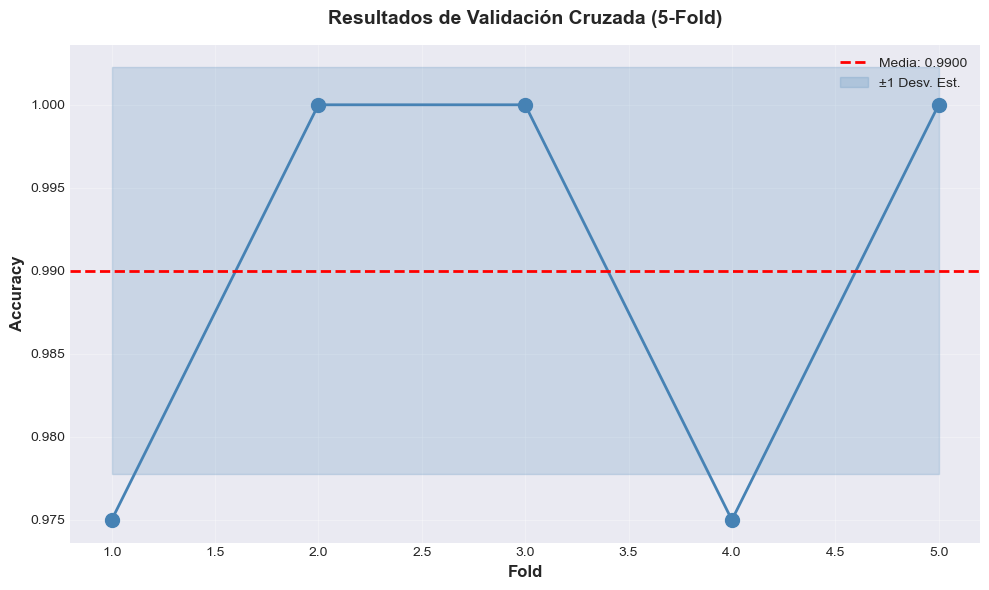

In [14]:
# ============================================================================
# CELDA 14: VALIDACIÓN CRUZADA (K-FOLD)
# ============================================================================

print("="*70)
print("🔄 VALIDACIÓN CRUZADA (5-FOLD)")
print("="*70)

print("⏳ Ejecutando validación cruzada...")

# 5-Fold Cross Validation
cv_scores = cross_val_score(
    rf_model, 
    X_train, 
    y_train, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1
)

print("\n📊 RESULTADOS:")
print("-" * 70)
print(f"   Scores por Fold: {[f'{s:.4f}' for s in cv_scores]}")
print(f"\n   📈 Media:           {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
print(f"   📉 Desv. Estándar:  {cv_scores.std():.4f}")
print(f"   🎯 Min:             {cv_scores.min():.4f}")
print(f"   🎯 Max:             {cv_scores.max():.4f}")
print(f"\n   📊 Intervalo de Confianza 95%:")
print(f"      [{cv_scores.mean() - 1.96*cv_scores.std():.4f}, {cv_scores.mean() + 1.96*cv_scores.std():.4f}]")

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linewidth=2, markersize=10, color='steelblue')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {cv_scores.mean():.4f}')
plt.fill_between(range(1, 6), 
                 cv_scores.mean() - cv_scores.std(), 
                 cv_scores.mean() + cv_scores.std(), 
                 alpha=0.2, color='steelblue', label='±1 Desv. Est.')
plt.xlabel('Fold', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Resultados de Validación Cruzada (5-Fold)', fontsize=14, fontweight='bold', pad=15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [15]:
# ============================================================================
# CELDA 15: FUNCIÓN DE PREDICCIÓN
# ============================================================================

def predecir_carrera(datos_estudiante):
    """
    Predice la carrera recomendada para un estudiante
    
    Parameters:
    -----------
    datos_estudiante : dict
        Diccionario con las 17 features del estudiante
        
    Returns:
    --------
    dict : Predicción con carrera principal, confianza y top 3 carreras
    """
    # Convertir a DataFrame
    df_estudiante = pd.DataFrame([datos_estudiante])
    
    # Cargar modelo y label encoder
    modelo = joblib.load('modelo_random_forest.pkl')
    label_enc = joblib.load('label_encoder.pkl')
    
    # Predecir
    prediccion = modelo.predict(df_estudiante)[0]
    probabilidades = modelo.predict_proba(df_estudiante)[0]
    
    # Obtener top 3 carreras
    top_3_idx = np.argsort(probabilidades)[-3:][::-1]
    top_3_carreras = [
        {
            'carrera': label_enc.inverse_transform([idx])[0],
            'probabilidad': float(probabilidades[idx])
        }
        for idx in top_3_idx
    ]
    
    resultado = {
        'carrera_recomendada': label_enc.inverse_transform([prediccion])[0],
        'confianza': float(probabilidades[prediccion]),
        'top_3': top_3_carreras
    }
    
    return resultado

print("✅ Función 'predecir_carrera()' definida correctamente")
print("\nUso:")
print("   resultado = predecir_carrera(datos_dict)")


✅ Función 'predecir_carrera()' definida correctamente

Uso:
   resultado = predecir_carrera(datos_dict)


In [22]:
# ============================================================================
# CELDA 16: EJEMPLO DE PREDICCIÓN
# ============================================================================

print("="*70)
print("🧪 EJEMPLO DE PREDICCIÓN")
print("="*70)

# Ejemplo de estudiante con perfil de Ingeniería Civil
ejemplo_estudiante = {
    'R': 3.2, 'I': 2.8, 'A': 4.0, 'S': 3.5, 'E': 3.1, 'C': 2.9,
    'LM': 3.7, 'L': 4.2, 'ES': 3.9, 'M': 0.4, 'CK': 2.8,
    'IP': 3.0, 'IA': 2.7, 'N': 3.4,
    'Rendimiento_General': 3,
    'Rendimiento_STEM': 1,
    'Rendimiento_Humanidades': 4
}





print("👤 PERFIL DEL ESTUDIANTE:")
print("-" * 70)
print("RIASEC:")
print(f"   R: {ejemplo_estudiante['R']}  |  I: {ejemplo_estudiante['I']}  |  A: {ejemplo_estudiante['A']}")
print(f"   S: {ejemplo_estudiante['S']}  |  E: {ejemplo_estudiante['E']}  |  C: {ejemplo_estudiante['C']}")
print("\nGardner:")
print(f"   LM: {ejemplo_estudiante['LM']}  |  L: {ejemplo_estudiante['L']}  |  ES: {ejemplo_estudiante['ES']}  |  M: {ejemplo_estudiante['M']}")
print(f"   CK: {ejemplo_estudiante['CK']}  |  IP: {ejemplo_estudiante['IP']}  |  IA: {ejemplo_estudiante['IA']}  |  N: {ejemplo_estudiante['N']}")
print("\nRendimiento:")
print(f"   General: {ejemplo_estudiante['Rendimiento_General']}/5  |  STEM: {ejemplo_estudiante['Rendimiento_STEM']}/5  |  Humanidades: {ejemplo_estudiante['Rendimiento_Humanidades']}/5")

# Realizar predicción
resultado = predecir_carrera(ejemplo_estudiante)

print("\n" + "="*70)
print("🎯 RESULTADO DE LA PREDICCIÓN")
print("="*70)
print(f"\n🏆 CARRERA RECOMENDADA: {resultado['carrera_recomendada']}")
print(f"✅ Confianza: {resultado['confianza']*100:.2f}%")

print("\n📊 TOP 3 CARRERAS:")
print("-" * 70)
for i, carrera_info in enumerate(resultado['top_3'], 1):
    barra = '█' * int(carrera_info['probabilidad'] * 50)
    print(f"{i}. {carrera_info['carrera']:30s} | {carrera_info['probabilidad']*100:5.2f}% | {barra}")


🧪 EJEMPLO DE PREDICCIÓN
👤 PERFIL DEL ESTUDIANTE:
----------------------------------------------------------------------
RIASEC:
   R: 3.2  |  I: 2.8  |  A: 4.0
   S: 3.5  |  E: 3.1  |  C: 2.9

Gardner:
   LM: 3.7  |  L: 4.2  |  ES: 3.9  |  M: 0.4
   CK: 2.8  |  IP: 3.0  |  IA: 2.7  |  N: 3.4

Rendimiento:
   General: 3/5  |  STEM: 1/5  |  Humanidades: 4/5

🎯 RESULTADO DE LA PREDICCIÓN

🏆 CARRERA RECOMENDADA: Arquitectura
✅ Confianza: 29.36%

📊 TOP 3 CARRERAS:
----------------------------------------------------------------------
1. Arquitectura                   | 29.36% | ██████████████
2. Ingeniería Civil               | 19.53% | █████████
3. Ingeniería en Sistemas         | 11.15% | █████


In [23]:
# ============================================================================
# EJEMPLO DE TEST VOCACIONAL PARA PROBAR EN JUPYTER
# ============================================================================

# Ejecutar después de entrenar el modelo (Celda 18 del notebook de entrenamiento)

import joblib
import pandas as pd
import numpy as np

print("="*70)
print("🧪 TEST VOCACIONAL INTERACTIVO")
print("="*70)
print("\nResponde cada pregunta con un valor del 1 al 5:")
print("  1 = Nada         (No me interesa en absoluto)")
print("  2 = Poco         (Me interesa ligeramente)")
print("  3 = Moderado     (Me interesa en nivel medio)")
print("  4 = Mucho        (Me interesa bastante)")
print("  5 = Totalmente   (Me apasiona)")
print("\n" + "="*70)

# ============================================================================
# SECCIÓN 1: RIASEC (30 preguntas = 6 dimensiones × 5 preguntas)
# ============================================================================

print("\n" + "🔵"*35)
print("PARTE 1: INTERESES VOCACIONALES (RIASEC)")
print("🔵"*35)

# R - REALISTA
print("\n" + "="*70)
print("📐 DIMENSIÓN R - REALISTA (Práctico/Manual)")
print("="*70)

R1 = int(input("1. ¿Te gusta trabajar con herramientas, máquinas o equipos? (1-5): "))
R2 = int(input("2. ¿Prefieres actividades al aire libre o trabajos físicos? (1-5): "))
R3 = int(input("3. ¿Te interesa construir, reparar o ensamblar cosas? (1-5): "))
R4 = int(input("4. ¿Disfrutas trabajando con materiales concretos? (1-5): "))
R5 = int(input("5. ¿Prefieres resolver problemas de forma práctica? (1-5): "))

R = round((R1 + R2 + R3 + R4 + R5) / 5, 1)
print(f"\n✅ Promedio R (Realista): {R}")

# I - INVESTIGATIVO
print("\n" + "="*70)
print("🔬 DIMENSIÓN I - INVESTIGATIVO (Analítico/Científico)")
print("="*70)

I1 = int(input("6. ¿Te gusta analizar datos o problemas complejos? (1-5): "))
I2 = int(input("7. ¿Disfrutas realizar experimentos científicos? (1-5): "))
I3 = int(input("8. ¿Te interesa entender cómo funcionan las cosas? (1-5): "))
I4 = int(input("9. ¿Prefieres trabajar con conceptos abstractos? (1-5): "))
I5 = int(input("10. ¿Te motiva resolver problemas con lógica? (1-5): "))

I = round((I1 + I2 + I3 + I4 + I5) / 5, 1)
print(f"\n✅ Promedio I (Investigativo): {I}")

# A - ARTÍSTICO
print("\n" + "="*70)
print("🎨 DIMENSIÓN A - ARTÍSTICO (Creativo/Expresivo)")
print("="*70)

A1 = int(input("11. ¿Te gusta expresarte a través del arte o música? (1-5): "))
A2 = int(input("12. ¿Disfrutas diseñar o crear cosas? (1-5): "))
A3 = int(input("13. ¿Prefieres trabajos creativos y originales? (1-5): "))
A4 = int(input("14. ¿Te interesa la estética y diseño? (1-5): "))
A5 = int(input("15. ¿Te motiva trabajar en proyectos artísticos? (1-5): "))

A = round((A1 + A2 + A3 + A4 + A5) / 5, 1)
print(f"\n✅ Promedio A (Artístico): {A}")

# S - SOCIAL
print("\n" + "="*70)
print("🤝 DIMENSIÓN S - SOCIAL (Ayuda/Enseñanza)")
print("="*70)

S1 = int(input("16. ¿Te gusta ayudar a otras personas? (1-5): "))
S2 = int(input("17. ¿Disfrutas enseñar o capacitar a otros? (1-5): "))
S3 = int(input("18. ¿Prefieres trabajar en equipo? (1-5): "))
S4 = int(input("19. ¿Te interesa el bienestar de las personas? (1-5): "))
S5 = int(input("20. ¿Te motiva el servicio comunitario? (1-5): "))

S = round((S1 + S2 + S3 + S4 + S5) / 5, 1)
print(f"\n✅ Promedio S (Social): {S}")

# E - EMPRENDEDOR
print("\n" + "="*70)
print("💼 DIMENSIÓN E - EMPRENDEDOR (Liderazgo/Persuasión)")
print("="*70)

E1 = int(input("21. ¿Te gusta liderar grupos o proyectos? (1-5): "))
E2 = int(input("22. ¿Disfrutas persuadir a otras personas? (1-5): "))
E3 = int(input("23. ¿Prefieres tomar decisiones y asumir riesgos? (1-5): "))
E4 = int(input("24. ¿Te interesa iniciar tu propio negocio? (1-5): "))
E5 = int(input("25. ¿Te motiva competir y alcanzar metas? (1-5): "))

E = round((E1 + E2 + E3 + E4 + E5) / 5, 1)
print(f"\n✅ Promedio E (Emprendedor): {E}")

# C - CONVENCIONAL
print("\n" + "="*70)
print("📋 DIMENSIÓN C - CONVENCIONAL (Organización/Detalle)")
print("="*70)

C1 = int(input("26. ¿Te gusta organizar información o documentos? (1-5): "))
C2 = int(input("27. ¿Disfrutas seguir procedimientos establecidos? (1-5): "))
C3 = int(input("28. ¿Prefieres trabajos que requieren precisión? (1-5): "))
C4 = int(input("29. ¿Te interesa trabajar con números y datos? (1-5): "))
C5 = int(input("30. ¿Te motiva mantener sistemas ordenados? (1-5): "))

C = round((C1 + C2 + C3 + C4 + C5) / 5, 1)
print(f"\n✅ Promedio C (Convencional): {C}")

# ============================================================================
# SECCIÓN 2: GARDNER (32 preguntas = 8 dimensiones × 4 preguntas)
# ============================================================================

print("\n\n" + "🟢"*35)
print("PARTE 2: INTELIGENCIAS MÚLTIPLES (GARDNER)")
print("🟢"*35)

# LM - LÓGICO-MATEMÁTICA
print("\n" + "="*70)
print("🔢 DIMENSIÓN LM - LÓGICO-MATEMÁTICA")
print("="*70)

LM1 = int(input("31. ¿Entiendes fácilmente conceptos matemáticos? (1-5): "))
LM2 = int(input("32. ¿Te gusta resolver problemas de lógica? (1-5): "))
LM3 = int(input("33. ¿Eres bueno identificando patrones? (1-5): "))
LM4 = int(input("34. ¿Disfrutas trabajando con cálculos? (1-5): "))

LM = round((LM1 + LM2 + LM3 + LM4) / 4, 1)
print(f"\n✅ Promedio LM (Lógico-Matemática): {LM}")

# L - LINGÜÍSTICA
print("\n" + "="*70)
print("📚 DIMENSIÓN L - LINGÜÍSTICA")
print("="*70)

L1 = int(input("35. ¿Se te facilita expresarte con palabras? (1-5): "))
L2 = int(input("36. ¿Disfrutas leer, escribir o debatir? (1-5): "))
L3 = int(input("37. ¿Tienes buen vocabulario? (1-5): "))
L4 = int(input("38. ¿Te gusta contar historias? (1-5): "))

L = round((L1 + L2 + L3 + L4) / 4, 1)
print(f"\n✅ Promedio L (Lingüística): {L}")

# ES - ESPACIAL
print("\n" + "="*70)
print("🗺️ DIMENSIÓN ES - ESPACIAL")
print("="*70)

ES1 = int(input("39. ¿Visualizas fácilmente objetos en 3D? (1-5): "))
ES2 = int(input("40. ¿Te orientas bien en espacios? (1-5): "))
ES3 = int(input("41. ¿Eres bueno dibujando o diseñando? (1-5): "))
ES4 = int(input("42. ¿Disfrutas trabajar con imágenes? (1-5): "))

ES = round((ES1 + ES2 + ES3 + ES4) / 4, 1)
print(f"\n✅ Promedio ES (Espacial): {ES}")

# M - MUSICAL
print("\n" + "="*70)
print("🎵 DIMENSIÓN M - MUSICAL")
print("="*70)

M1 = int(input("43. ¿Tienes buen sentido del ritmo? (1-5): "))
M2 = int(input("44. ¿Disfrutas la música? (1-5): "))
M3 = int(input("45. ¿Reconoces fácilmente tonos musicales? (1-5): "))
M4 = int(input("46. ¿Te expresas mejor con música? (1-5): "))

M = round((M1 + M2 + M3 + M4) / 4, 1)
print(f"\n✅ Promedio M (Musical): {M}")

# CK - CORPORAL-KINESTÉSICA
print("\n" + "="*70)
print("🏃 DIMENSIÓN CK - CORPORAL-KINESTÉSICA")
print("="*70)

CK1 = int(input("47. ¿Tienes buena coordinación corporal? (1-5): "))
CK2 = int(input("48. ¿Disfrutas actividades físicas? (1-5): "))
CK3 = int(input("49. ¿Aprendes mejor haciendo? (1-5): "))
CK4 = int(input("50. ¿Eres hábil con manualidades? (1-5): "))

CK = round((CK1 + CK2 + CK3 + CK4) / 4, 1)
print(f"\n✅ Promedio CK (Corporal-Kinestésica): {CK}")

# IP - INTERPERSONAL
print("\n" + "="*70)
print("👥 DIMENSIÓN IP - INTERPERSONAL")
print("="*70)

IP1 = int(input("51. ¿Entiendes las emociones de otros? (1-5): "))
IP2 = int(input("52. ¿Disfrutas trabajar en equipo? (1-5): "))
IP3 = int(input("53. ¿Eres bueno resolviendo conflictos? (1-5): "))
IP4 = int(input("54. ¿Te adaptas a diferentes personalidades? (1-5): "))

IP = round((IP1 + IP2 + IP3 + IP4) / 4, 1)
print(f"\n✅ Promedio IP (Interpersonal): {IP}")

# IA - INTRAPERSONAL
print("\n" + "="*70)
print("🧘 DIMENSIÓN IA - INTRAPERSONAL")
print("="*70)

IA1 = int(input("55. ¿Conoces bien tus emociones? (1-5): "))
IA2 = int(input("56. ¿Prefieres trabajar independientemente? (1-5): "))
IA3 = int(input("57. ¿Reflexionas sobre tus metas? (1-5): "))
IA4 = int(input("58. ¿Eres autodisciplinado? (1-5): "))

IA = round((IA1 + IA2 + IA3 + IA4) / 4, 1)
print(f"\n✅ Promedio IA (Intrapersonal): {IA}")

# N - NATURALISTA
print("\n" + "="*70)
print("🌿 DIMENSIÓN N - NATURALISTA")
print("="*70)

N1 = int(input("59. ¿Te interesa la naturaleza? (1-5): "))
N2 = int(input("60. ¿Disfrutas actividades al aire libre? (1-5): "))
N3 = int(input("61. ¿Reconoces elementos naturales? (1-5): "))
N4 = int(input("62. ¿Te preocupa el medio ambiente? (1-5): "))

N = round((N1 + N2 + N3 + N4) / 4, 1)
print(f"\n✅ Promedio N (Naturalista): {N}")

# ============================================================================
# SECCIÓN 3: CONTEXTO ACADÉMICO (3 preguntas)
# ============================================================================

print("\n\n" + "🟡"*35)
print("PARTE 3: RENDIMIENTO ACADÉMICO")
print("🟡"*35)
print("\nEscala: 1=Deficiente, 2=Regular, 3=Bueno, 4=Muy Bueno, 5=Sobresaliente")

print("\n" + "="*70)
Rendimiento_General = int(input("63. ¿Cómo calificarías tu rendimiento académico general? (1-5): "))
Rendimiento_STEM = int(input("64. ¿Cómo es tu rendimiento en Matemáticas/Ciencias? (1-5): "))
Rendimiento_Humanidades = int(input("65. ¿Cómo es tu rendimiento en Lengua/Historia/Filosofía? (1-5): "))

# ============================================================================
# RESUMEN DE RESPUESTAS
# ============================================================================

print("\n\n" + "="*70)
print("📊 RESUMEN DE TU PERFIL")
print("="*70)

print("\n🔵 RIASEC:")
print(f"   R (Realista):      {R}")
print(f"   I (Investigativo): {I}")
print(f"   A (Artístico):     {A}")
print(f"   S (Social):        {S}")
print(f"   E (Emprendedor):   {E}")
print(f"   C (Convencional):  {C}")

print("\n🟢 GARDNER:")
print(f"   LM (Lógico-Matemática):    {LM}")
print(f"   L (Lingüística):           {L}")
print(f"   ES (Espacial):             {ES}")
print(f"   M (Musical):               {M}")
print(f"   CK (Corporal-Kinestésica): {CK}")
print(f"   IP (Interpersonal):        {IP}")
print(f"   IA (Intrapersonal):        {IA}")
print(f"   N (Naturalista):           {N}")

print("\n🟡 RENDIMIENTO:")
print(f"   General:      {Rendimiento_General}")
print(f"   STEM:         {Rendimiento_STEM}")
print(f"   Humanidades:  {Rendimiento_Humanidades}")

# ============================================================================
# CREAR DICCIONARIO PARA PREDICCIÓN
# ============================================================================

datos_estudiante = {
    'R': R, 'I': I, 'A': A, 'S': S, 'E': E, 'C': C,
    'LM': LM, 'L': L, 'ES': ES, 'M': M, 'CK': CK, 'IP': IP, 'IA': IA, 'N': N,
    'Rendimiento_General': Rendimiento_General,
    'Rendimiento_STEM': Rendimiento_STEM,
    'Rendimiento_Humanidades': Rendimiento_Humanidades
}

# ============================================================================
# REALIZAR PREDICCIÓN
# ============================================================================

print("\n\n" + "🔮"*35)
print("GENERANDO TU RECOMENDACIÓN VOCACIONAL...")
print("🔮"*35)

# Cargar modelo
modelo = joblib.load('modelo_random_forest.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Convertir a DataFrame
df_estudiante = pd.DataFrame([datos_estudiante])

# Predecir
prediccion = modelo.predict(df_estudiante)[0]
probabilidades = modelo.predict_proba(df_estudiante)[0]

# Obtener top 3
top_3_idx = np.argsort(probabilidades)[-3:][::-1]

# ============================================================================
# MOSTRAR RESULTADOS
# ============================================================================

print("\n" + "="*70)
print("🎯 TU RESULTADO")
print("="*70)

carrera_recomendada = label_encoder.inverse_transform([prediccion])[0]
confianza = probabilidades[prediccion]

print(f"\n🏆 CARRERA RECOMENDADA: {carrera_recomendada}")
print(f"✅ Confianza del modelo: {confianza*100:.2f}%")

print("\n📊 TOP 3 CARRERAS MÁS COMPATIBLES:")
print("="*70)

for i, idx in enumerate(top_3_idx, 1):
    carrera = label_encoder.inverse_transform([idx])[0]
    prob = probabilidades[idx]
    barra = '█' * int(prob * 50)
    
    print(f"\n{i}. {carrera}")
    print(f"   Compatibilidad: {prob*100:.2f}%")
    print(f"   {barra}")

# ============================================================================
# ANÁLISIS DE PERFIL
# ============================================================================

print("\n\n" + "="*70)
print("🔍 ANÁLISIS DE TU PERFIL VOCACIONAL")
print("="*70)

# Dimensiones más altas RIASEC
riasec_dict = {'R': R, 'I': I, 'A': A, 'S': S, 'E': E, 'C': C}
riasec_nombres = {
    'R': 'Realista (práctico/manual)',
    'I': 'Investigativo (analítico/científico)',
    'A': 'Artístico (creativo/expresivo)',
    'S': 'Social (ayuda/enseñanza)',
    'E': 'Emprendedor (liderazgo/persuasión)',
    'C': 'Convencional (organización/detalle)'
}

top_riasec = sorted(riasec_dict.items(), key=lambda x: x[1], reverse=True)[:3]

print("\n🔵 Tus 3 principales intereses vocacionales (RIASEC):")
for i, (key, value) in enumerate(top_riasec, 1):
    print(f"   {i}. {riasec_nombres[key]}: {value}/5")

# Dimensiones más altas Gardner
gardner_dict = {'LM': LM, 'L': L, 'ES': ES, 'M': M, 'CK': CK, 'IP': IP, 'IA': IA, 'N': N}
gardner_nombres = {
    'LM': 'Lógico-Matemática',
    'L': 'Lingüística',
    'ES': 'Espacial',
    'M': 'Musical',
    'CK': 'Corporal-Kinestésica',
    'IP': 'Interpersonal',
    'IA': 'Intrapersonal',
    'N': 'Naturalista'
}

top_gardner = sorted(gardner_dict.items(), key=lambda x: x[1], reverse=True)[:3]

print("\n🟢 Tus 3 inteligencias más desarrolladas (Gardner):")
for i, (key, value) in enumerate(top_gardner, 1):
    print(f"   {i}. {gardner_nombres[key]}: {value}/5")

print("\n🟡 Tu rendimiento académico:")
print(f"   General: {Rendimiento_General}/5")
print(f"   STEM (Ciencias/Matemáticas): {Rendimiento_STEM}/5")
print(f"   Humanidades: {Rendimiento_Humanidades}/5")

# ============================================================================
# RECOMENDACIONES
# ============================================================================

print("\n\n" + "="*70)
print("💡 RECOMENDACIONES")
print("="*70)

print(f"\n✅ La carrera de {carrera_recomendada} es la más compatible con tu perfil.")
print(f"\n📌 Considera también explorar las otras opciones del Top 3.")
print(f"\n🔍 Investiga más sobre estas carreras:")
print(f"   - Plan de estudios")
print(f"   - Campo laboral")
print(f"   - Universidades que la ofrecen")
print(f"   - Testimonios de profesionales")

print("\n" + "="*70)
print("✅ TEST COMPLETADO")
print("="*70)
print("\n🎉 ¡Mucha suerte en tu decisión vocacional!")

# ============================================================================
# GUARDAR RESULTADOS (OPCIONAL)
# ============================================================================

guardar = input("\n¿Quieres guardar tus resultados? (s/n): ")

if guardar.lower() == 's':
    nombre = input("Ingresa tu nombre: ")
    
    resultado_completo = {
        'nombre': nombre,
        'perfil': datos_estudiante,
        'carrera_recomendada': carrera_recomendada,
        'confianza': float(confianza),
        'top_3': [
            {
                'carrera': label_encoder.inverse_transform([idx])[0],
                'probabilidad': float(probabilidades[idx])
            }
            for idx in top_3_idx
        ]
    }
    
    import json
    from datetime import datetime
    
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filename = f'resultado_{nombre}_{timestamp}.json'
    
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(resultado_completo, f, indent=2, ensure_ascii=False)
    
    print(f"\n✅ Resultados guardados en: {filename}")

🧪 TEST VOCACIONAL INTERACTIVO

Responde cada pregunta con un valor del 1 al 5:
  1 = Nada         (No me interesa en absoluto)
  2 = Poco         (Me interesa ligeramente)
  3 = Moderado     (Me interesa en nivel medio)
  4 = Mucho        (Me interesa bastante)
  5 = Totalmente   (Me apasiona)


🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵
PARTE 1: INTERESES VOCACIONALES (RIASEC)
🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵

📐 DIMENSIÓN R - REALISTA (Práctico/Manual)


1. ¿Te gusta trabajar con herramientas, máquinas o equipos? (1-5):  2
2. ¿Prefieres actividades al aire libre o trabajos físicos? (1-5):  1
3. ¿Te interesa construir, reparar o ensamblar cosas? (1-5):  1
4. ¿Disfrutas trabajando con materiales concretos? (1-5):  1
5. ¿Prefieres resolver problemas de forma práctica? (1-5):  5



✅ Promedio R (Realista): 2.0

🔬 DIMENSIÓN I - INVESTIGATIVO (Analítico/Científico)


6. ¿Te gusta analizar datos o problemas complejos? (1-5):  3
7. ¿Disfrutas realizar experimentos científicos? (1-5):  2
8. ¿Te interesa entender cómo funcionan las cosas? (1-5):  4
9. ¿Prefieres trabajar con conceptos abstractos? (1-5):  3
10. ¿Te motiva resolver problemas con lógica? (1-5):  5



✅ Promedio I (Investigativo): 3.4

🎨 DIMENSIÓN A - ARTÍSTICO (Creativo/Expresivo)


11. ¿Te gusta expresarte a través del arte o música? (1-5):  1
12. ¿Disfrutas diseñar o crear cosas? (1-5):  3
13. ¿Prefieres trabajos creativos y originales? (1-5):  3
14. ¿Te interesa la estética y diseño? (1-5):  2
15. ¿Te motiva trabajar en proyectos artísticos? (1-5):  1



✅ Promedio A (Artístico): 2.0

🤝 DIMENSIÓN S - SOCIAL (Ayuda/Enseñanza)


16. ¿Te gusta ayudar a otras personas? (1-5):  4
17. ¿Disfrutas enseñar o capacitar a otros? (1-5):  1
18. ¿Prefieres trabajar en equipo? (1-5):  3
19. ¿Te interesa el bienestar de las personas? (1-5):  4
20. ¿Te motiva el servicio comunitario? (1-5):  1



✅ Promedio S (Social): 2.6

💼 DIMENSIÓN E - EMPRENDEDOR (Liderazgo/Persuasión)


21. ¿Te gusta liderar grupos o proyectos? (1-5):  2
22. ¿Disfrutas persuadir a otras personas? (1-5):  2
23. ¿Prefieres tomar decisiones y asumir riesgos? (1-5):  3
24. ¿Te interesa iniciar tu propio negocio? (1-5):  1
25. ¿Te motiva competir y alcanzar metas? (1-5):  3



✅ Promedio E (Emprendedor): 2.2

📋 DIMENSIÓN C - CONVENCIONAL (Organización/Detalle)


26. ¿Te gusta organizar información o documentos? (1-5):  2
27. ¿Disfrutas seguir procedimientos establecidos? (1-5):  2
28. ¿Prefieres trabajos que requieren precisión? (1-5):  3
29. ¿Te interesa trabajar con números y datos? (1-5):  3
30. ¿Te motiva mantener sistemas ordenados? (1-5):  4



✅ Promedio C (Convencional): 2.8


🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢
PARTE 2: INTELIGENCIAS MÚLTIPLES (GARDNER)
🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢

🔢 DIMENSIÓN LM - LÓGICO-MATEMÁTICA


31. ¿Entiendes fácilmente conceptos matemáticos? (1-5):  4
32. ¿Te gusta resolver problemas de lógica? (1-5):  4
33. ¿Eres bueno identificando patrones? (1-5):  3
34. ¿Disfrutas trabajando con cálculos? (1-5):  3



✅ Promedio LM (Lógico-Matemática): 3.5

📚 DIMENSIÓN L - LINGÜÍSTICA


35. ¿Se te facilita expresarte con palabras? (1-5):  2
36. ¿Disfrutas leer, escribir o debatir? (1-5):  1
37. ¿Tienes buen vocabulario? (1-5):  2
38. ¿Te gusta contar historias? (1-5):  2



✅ Promedio L (Lingüística): 1.8

🗺️ DIMENSIÓN ES - ESPACIAL


39. ¿Visualizas fácilmente objetos en 3D? (1-5):  4
40. ¿Te orientas bien en espacios? (1-5):  2
41. ¿Eres bueno dibujando o diseñando? (1-5):  1
42. ¿Disfrutas trabajar con imágenes? (1-5):  1



✅ Promedio ES (Espacial): 2.0

🎵 DIMENSIÓN M - MUSICAL


43. ¿Tienes buen sentido del ritmo? (1-5):  1
44. ¿Disfrutas la música? (1-5):  5
45. ¿Reconoces fácilmente tonos musicales? (1-5):  1
46. ¿Te expresas mejor con música? (1-5):  1



✅ Promedio M (Musical): 2.0

🏃 DIMENSIÓN CK - CORPORAL-KINESTÉSICA


47. ¿Tienes buena coordinación corporal? (1-5):  2
48. ¿Disfrutas actividades físicas? (1-5):  1
49. ¿Aprendes mejor haciendo? (1-5):  4
50. ¿Eres hábil con manualidades? (1-5):  1



✅ Promedio CK (Corporal-Kinestésica): 2.0

👥 DIMENSIÓN IP - INTERPERSONAL


51. ¿Entiendes las emociones de otros? (1-5):  3
52. ¿Disfrutas trabajar en equipo? (1-5):  3
53. ¿Eres bueno resolviendo conflictos? (1-5):  2
54. ¿Te adaptas a diferentes personalidades? (1-5):  4



✅ Promedio IP (Interpersonal): 3.0

🧘 DIMENSIÓN IA - INTRAPERSONAL


55. ¿Conoces bien tus emociones? (1-5):  3
56. ¿Prefieres trabajar independientemente? (1-5):  1
57. ¿Reflexionas sobre tus metas? (1-5):  2
58. ¿Eres autodisciplinado? (1-5):  1



✅ Promedio IA (Intrapersonal): 1.8

🌿 DIMENSIÓN N - NATURALISTA


59. ¿Te interesa la naturaleza? (1-5):  5
60. ¿Disfrutas actividades al aire libre? (1-5):  3
61. ¿Reconoces elementos naturales? (1-5):  1
62. ¿Te preocupa el medio ambiente? (1-5):  5



✅ Promedio N (Naturalista): 3.5


🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡
PARTE 3: RENDIMIENTO ACADÉMICO
🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡🟡

Escala: 1=Deficiente, 2=Regular, 3=Bueno, 4=Muy Bueno, 5=Sobresaliente



63. ¿Cómo calificarías tu rendimiento académico general? (1-5):  3
64. ¿Cómo es tu rendimiento en Matemáticas/Ciencias? (1-5):  2
65. ¿Cómo es tu rendimiento en Lengua/Historia/Filosofía? (1-5):  2




📊 RESUMEN DE TU PERFIL

🔵 RIASEC:
   R (Realista):      2.0
   I (Investigativo): 3.4
   A (Artístico):     2.0
   S (Social):        2.6
   E (Emprendedor):   2.2
   C (Convencional):  2.8

🟢 GARDNER:
   LM (Lógico-Matemática):    3.5
   L (Lingüística):           1.8
   ES (Espacial):             2.0
   M (Musical):               2.0
   CK (Corporal-Kinestésica): 2.0
   IP (Interpersonal):        3.0
   IA (Intrapersonal):        1.8
   N (Naturalista):           3.5

🟡 RENDIMIENTO:
   General:      3
   STEM:         2
   Humanidades:  2


🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮
GENERANDO TU RECOMENDACIÓN VOCACIONAL...
🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮🔮

🎯 TU RESULTADO

🏆 CARRERA RECOMENDADA: Contabilidad
✅ Confianza del modelo: 51.28%

📊 TOP 3 CARRERAS MÁS COMPATIBLES:

1. Contabilidad
   Compatibilidad: 51.28%
   █████████████████████████

2. Arquitectura
   Compatibilidad: 9.34%
   ████

3. Psicología
   Compatibilidad: 9.28%
   ████


🔍 ANÁLISIS DE TU PERFIL VOCACIONAL

🔵 Tus 3 p


¿Quieres guardar tus resultados? (s/n):  s
Ingresa tu nombre:  prueba1



✅ Resultados guardados en: resultado_prueba1_20251117_000857.json


In [ ]:
2